In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

from sklearn.utils.testing import ignore_warnings

### Stacking up some useful functions

In [2]:
def BestScore(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

def plot_feature_imp(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_,
                   index = columns).sort_values(ascending = True)
    
    plt.figure(figuresize = (12,9))
    plt.title("Feature Importance")
    
    ax = sns.barplot(y = imp.index[:nr_f], x = imip.values[:nr_f],
                    orient = 'h')

# Starter Code

In [3]:
train_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")

In [4]:
train_raw.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_raw.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
train_copy = train_raw.copy(deep = True)
test_copy = test_raw.copy(deep = True)

# EDA

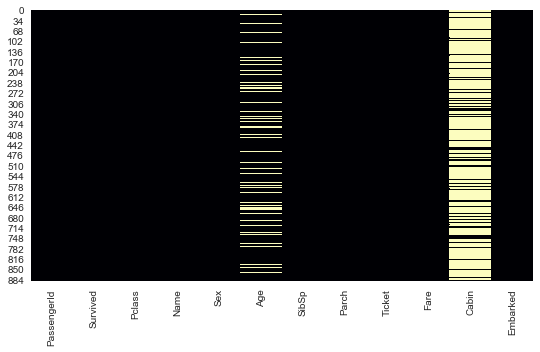

In [7]:
fig, axes = plt.subplots(figsize=(9,5))
sns.heatmap(train_copy.isnull(), cbar = False, cmap = 'magma',ax = axes)
plt.show()

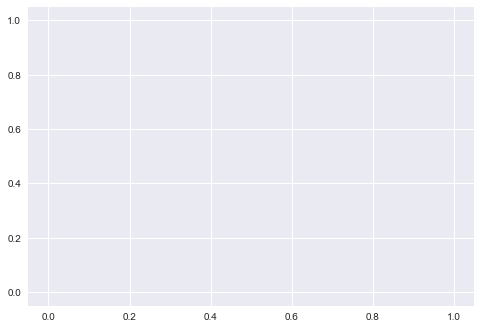

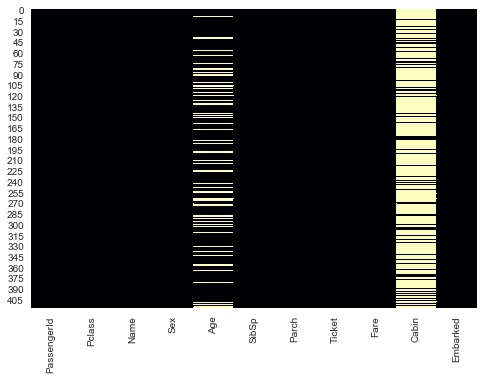

In [13]:
fig, axes = plt.subplots()
sns.heatmap(test_copy.isnull(), cbar = False, cmap = 'magma',ax = axes)
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

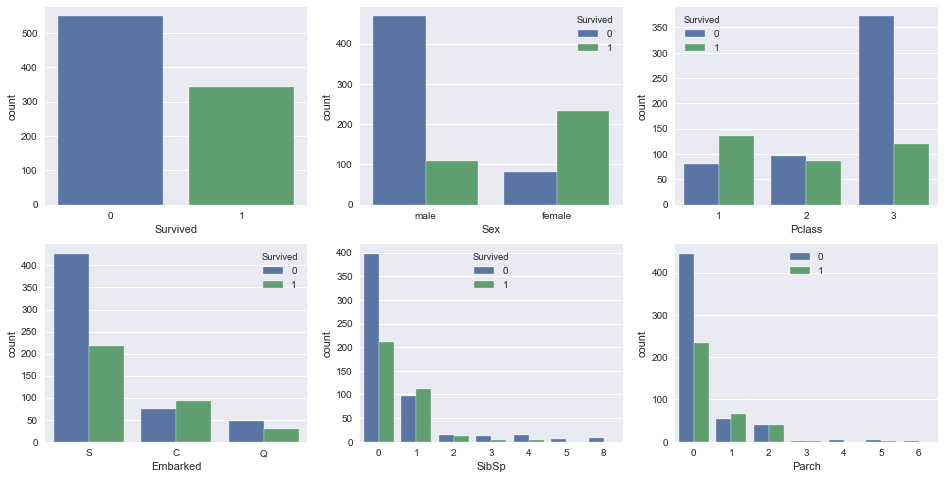

In [14]:
cols_to_visualize = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols,figsize=(16,8))

sns.countplot(x = 'Survived', data = train_copy,ax = axes[0][0])
sns.countplot(x = 'Sex',hue = 'Survived',data = train_copy,ax = axes[0][1])
sns.countplot(x = 'Pclass',hue = 'Survived',data = train_copy,ax = axes[0][2])
sns.countplot(x = 'Embarked',hue = 'Survived',data = train_copy,ax = axes[1][0])
sns.countplot(x = 'SibSp',hue = 'Survived',data = train_copy,ax = axes[1][1])
sns.countplot(x = 'Parch',hue = 'Survived',data = train_copy,ax = axes[1][2])

plt.legend(loc = 'upper center')
plt.show()

C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


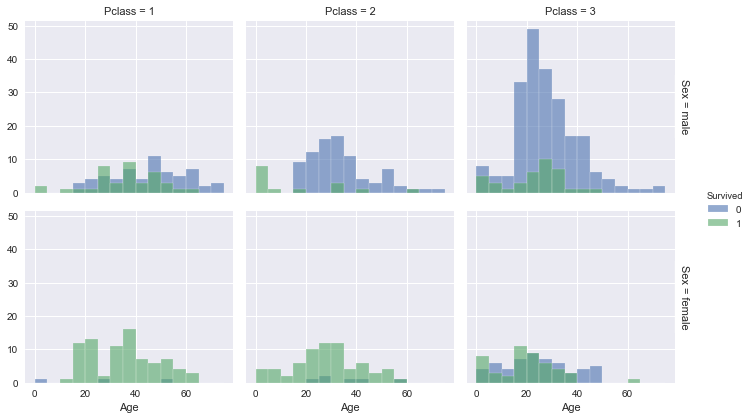

In [15]:
bins = np.arange(0,80,5)
g = sns.FacetGrid(train_copy, row = 'Sex', col = 'Pclass', hue = 'Survived',
                margin_titles = True, size = 3, aspect = 1.1)
g.map(sns.distplot, 'Age', kde = False, bins = bins, hist_kws = dict(alpha = 0.6))
g.add_legend()
plt.show()

Best chance of survival for male is when they're in Pclass1.
Most in Pclass 3 will die
Women tend to die more in Pclass 3 for all ages, especially those over 40

In [16]:
train_copy["Fare"].max()

512.3292

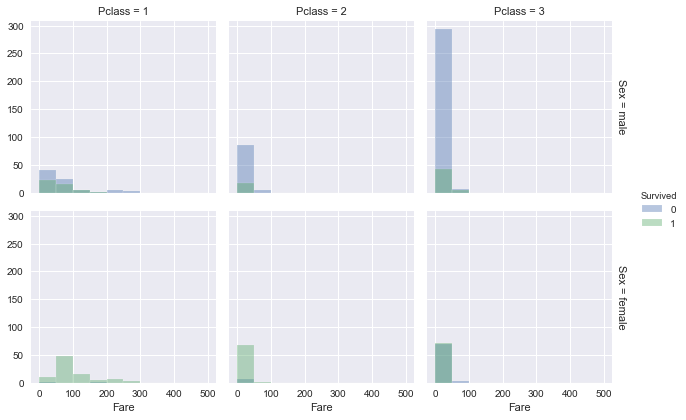

In [17]:
bins = np.arange(0,550,50)
g = sns.FacetGrid(data = train_copy, row = 'Sex', col = 'Pclass', 
                  hue = 'Survived', margin_titles = True)
g.map(sns.distplot,'Fare',kde = False, bins = bins)
g.add_legend()
plt.show()

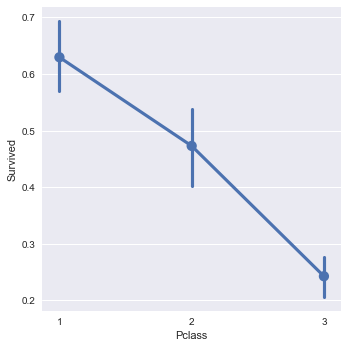

In [21]:
sns.catplot(kind = 'point', x = 'Pclass', y = 'Survived', data = train_copy)
plt.autoscale(enable=True, axis='both')
plt.show()


Pclass 3 is the worst to be on survival, for all the reasons for both the genders, though the intensity is much higher for men than females

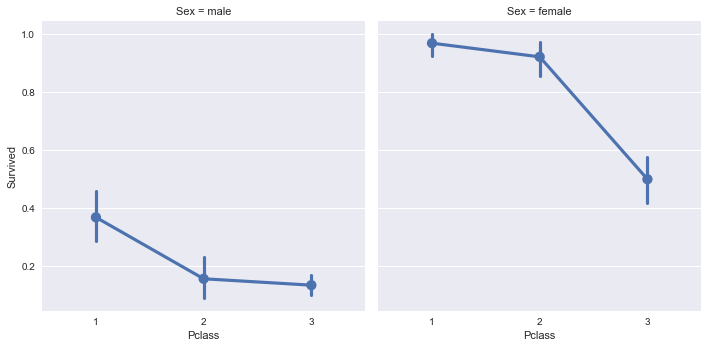

In [1392]:
sns.catplot(kind = 'point', x = 'Pclass', y = 'Survived', col = 'Sex', data = train_copy)
plt.show()

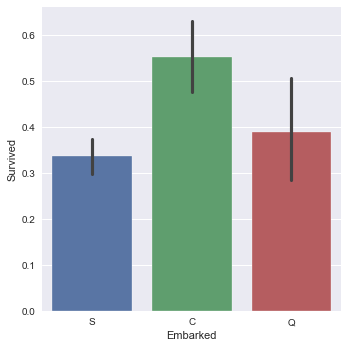

In [1393]:
sns.catplot(x = 'Embarked', y= 'Survived', kind = 'bar',data = train_copy)
plt.show()

C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


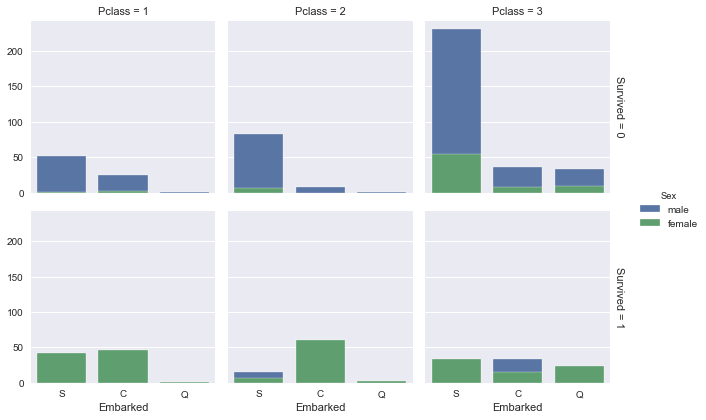

In [1394]:
#Embarked with Pclass as a survival function
g = sns.FacetGrid(data = train_copy, hue = 'Sex', row = 'Survived', col = 'Pclass',
                 margin_titles = True)
g.map(sns.countplot,'Embarked')
g.add_legend()
plt.show()

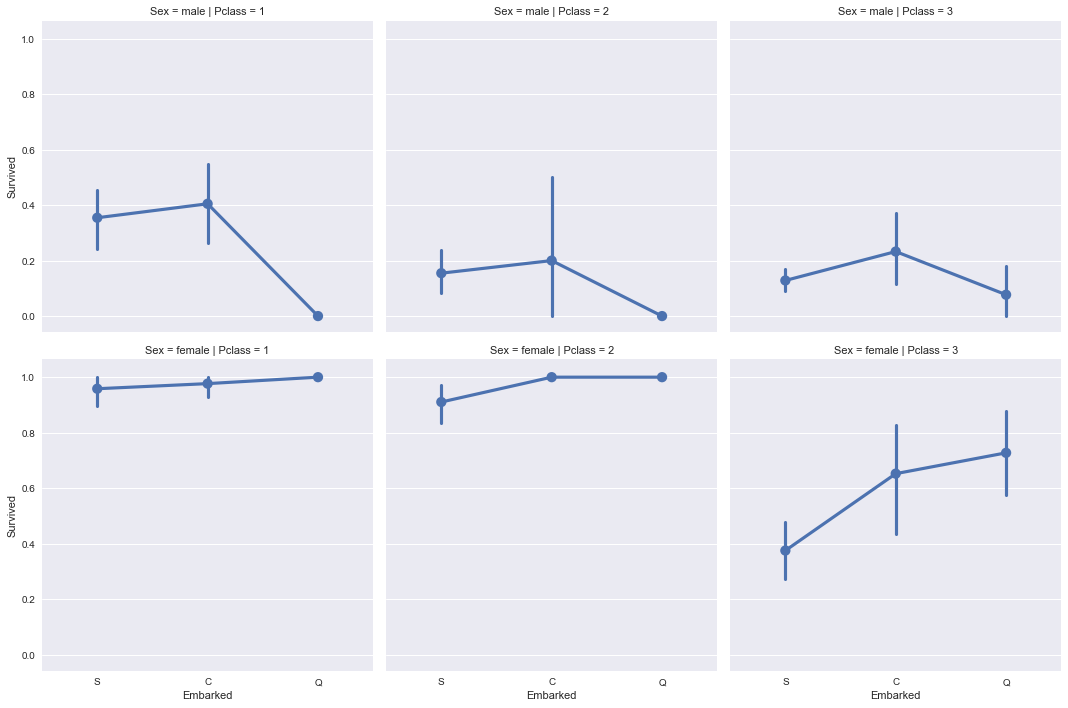

In [1395]:
sns.catplot(x = 'Embarked',y = 'Survived',kind = 'point',col = 'Pclass', row = 'Sex', data = train_copy)
plt.show()

In [1396]:
train_copy.loc[(train_copy['Sex']=='female') & (train_copy['Embarked']=='S') & (train_copy['Pclass']==1)&(train_copy['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S


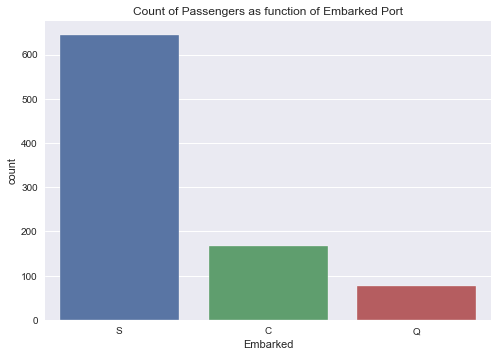

In [1397]:
sns.countplot(x='Embarked', data=train_copy)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

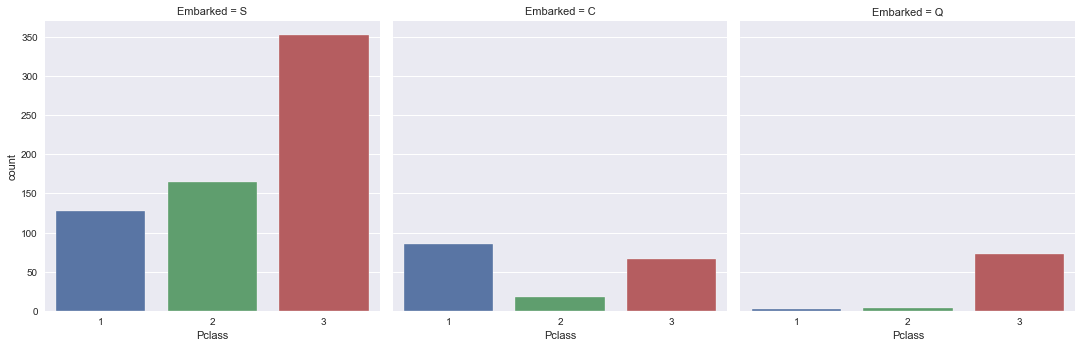

In [1398]:
sns.catplot(x='Pclass', kind = 'count', col = 'Embarked', data=train_copy)
plt.show()

A lot of the passengers embarking to Q had 3rd class Tickets. That's not a good place to be in if you're in for survival.

## Violin and Swarm Plots

C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


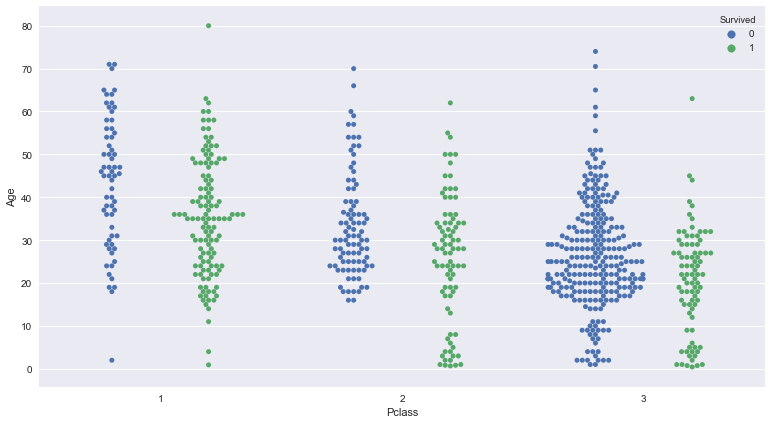

In [1399]:
fig, axes = plt.subplots(figsize = (13,7))
sns.swarmplot(x = 'Pclass', y = 'Age', hue = 'Survived',dodge = True,data = train_copy, ax = axes)
plt.show()

We can be sure to see that lower aged people have better survival chances if they're in 2nd or 3rd class, which is contrary to the popular finding that 2nd and 3rd class is nnot good for survival. So age is an important charcteristic. Let's split this into gender too.

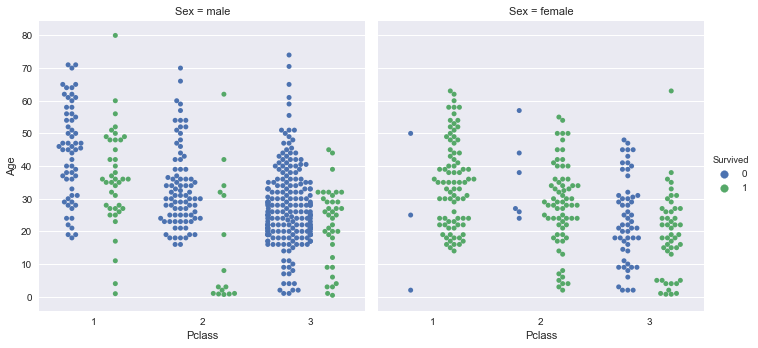

In [1400]:
sns.catplot(kind = 'swarm',x = 'Pclass', y = 'Age', col = 'Sex', hue = 'Survived',dodge = True,data = train_copy)
plt.show()

# Feature Engg. and Data Wrangling

In [1401]:
common_titles = ['Mr.','Miss.','Mrs.','Master.'] #From prev analysis

for df in [train_copy, test_copy]:
    
    df['FamilySize'] = df['Parch']+df['SibSp']+1
    
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
    
    df['NameLen'] = df['Name'].apply(lambda x : len(x))
    
    df['Title'] = df['Name'].apply(lambda x : x.split(',')[1].strip().split()[0])
    
    df['Title'] = df['Title'].apply( lambda x : x if x in common_titles else 'Misc.')

In [1402]:
train_copy.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,NameLen,Title
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,2,0,25,Mr.
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,3,0,39,Mrs.
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S,5,0,36,Miss.
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,1,1,32,Miss.
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,1,1,29,Miss.


In [1403]:
train_copy['NameLen'].nunique()

50

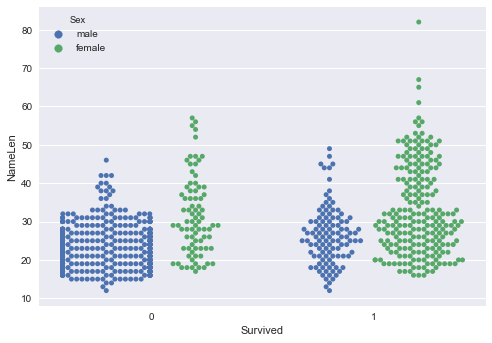

In [1404]:
sns.swarmplot(y = 'NameLen', x = 'Survived',hue = 'Sex',dodge = True, data = train_copy)
plt.show()

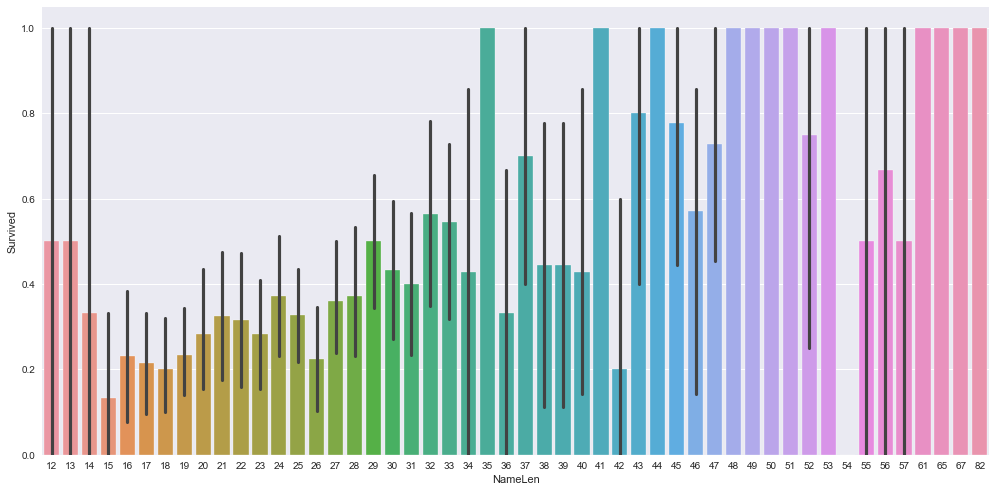

In [1405]:
sns.catplot(kind = 'bar', x = 'NameLen',y = 'Survived', data = train_copy, height = 7, aspect = 2)
plt.show()

In [1406]:
train_copy['NameLenBin'],train_namelen_bins = pd.cut(train_copy['NameLen'].astype(int),20,retbins = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

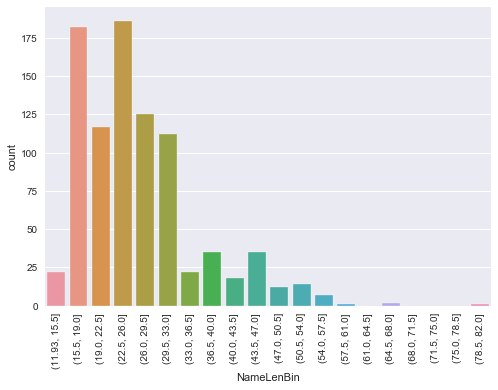

In [1407]:
sns.countplot(data = train_copy, x = 'NameLenBin')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

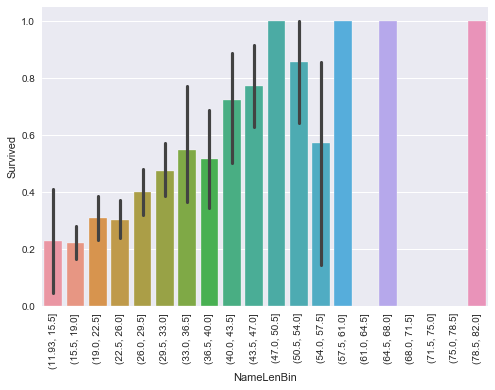

In [1408]:
sns.barplot(data = train_copy, x = 'NameLenBin', y = 'Survived')
plt.xticks(rotation = 'vertical')

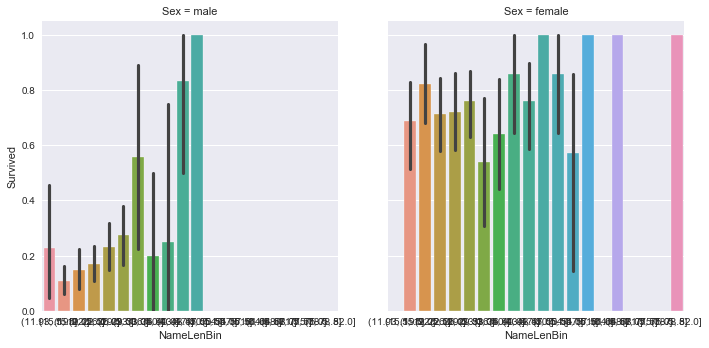

In [1409]:
sns.catplot(kind = 'bar', x = 'NameLenBin', y = 'Survived', col = 'Sex', data = train_copy)
plt.show()

### Title

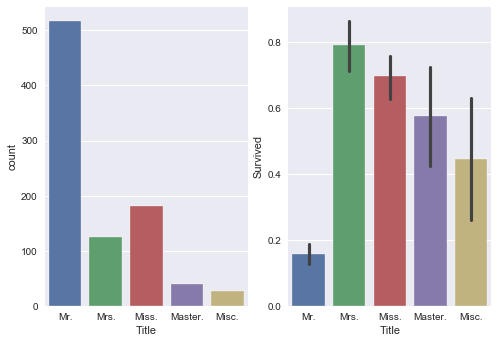

In [1410]:
fig, axes = plt.subplots(1,2)

sns.countplot(x = 'Title', data = train_copy, ax = axes [0])
sns.barplot(x = 'Title', y = 'Survived', data = train_copy, ax = axes[1])
plt.show()

## Family Size

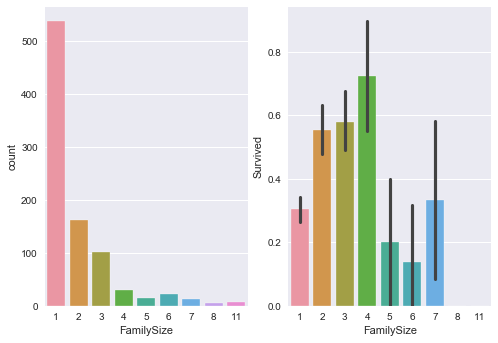

In [1411]:
fig, axes = plt.subplots(1,2)

sns.countplot(x = 'FamilySize', data = train_copy, ax = axes [0])
sns.barplot(x = 'FamilySize', y = 'Survived', data = train_copy, ax = axes[1])
plt.show()

# Data Wrangling

In [1412]:
#Filling missing ages by title

titlewise_grouping = train_copy.groupby('Title')
titlewise_agemean = titlewise_grouping.mean()

titlewise_agemean['Age'].to_frame()

,Age
Title,
Master.,4.574167
Misc.,42.384615
Miss.,21.773973
Mr.,32.368090
Mrs.,35.898148


In [1413]:
train_copy['Age'] = titlewise_grouping['Age'].apply(lambda x: x.fillna(x.mean()))

In [1414]:
#Same for test now

titlewise_grouping = test_copy.groupby('Title')
titlewise_agemean = titlewise_grouping.mean()

test_copy['Age'] = titlewise_grouping['Age'].apply(lambda x: x.fillna(x.mean()))

In [1415]:
#Filling Embarked and Fare and compiling them into bins

for dataset in [train_copy, test_copy]:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [1416]:
#NameLenBins already visualized above
train_copy['AgeBin'],train_age_bins = pd.cut(train_copy['Age'],8,retbins = True)
train_copy['FareBin'],train_fare_bins = pd.qcut(train_copy['Fare'],8,retbins = True)

test_age_bins = np.concatenate(([-np.inf], train_age_bins[1:-1], [np.inf]))
test_namelen_bins = np.concatenate(([-np.inf], train_namelen_bins[1:-1], [np.inf]))
test_copy['AgeBin'] = pd.cut(test_copy['Age'], test_age_bins)
test_copy['NameLenBin'] = pd.cut(test_copy['NameLen'], test_namelen_bins)

test_fare_bins = np.concatenate(([-np.inf], train_fare_bins[1:-1], [np.inf]))
test_copy['FareBin'] = pd.cut(test_copy['Fare'], test_fare_bins)

print("Done. Final Check")
print(train_copy.isnull().sum())
print("-"*25)
print(test_copy.isnull().sum())

Done. Final Check
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
Alone            0
NameLen          0
Title            0
NameLenBin       0
AgeBin           0
FareBin          0
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
Alone            0
NameLen          0
Title            0
AgeBin           0
NameLenBin       0
FareBin          0
dtype: int64


In [1417]:
passengerid = test_copy['PassengerId']

In [1418]:
train_copy.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,NameLen,Title,NameLenBin,AgeBin,FareBin
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50000,0,2,230080,26.0000,F2,S,3,0,40,Mr.,"(36.5, 40.0]","(30.263, 40.21]","(24.479, 31.0]"
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.00000,0,2,26360,26.0000,NaN,S,3,0,45,Mrs.,"(43.5, 47.0]","(30.263, 40.21]","(24.479, 31.0]"
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,32.36809,0,0,349215,7.8958,NaN,S,1,1,32,Mr.,"(29.5, 33.0]","(30.263, 40.21]","(7.75, 7.91]"
45,46,0,3,"Rogers, Mr. William John",male,32.36809,0,0,S.C./A.4. 23567,8.0500,NaN,S,1,1,24,Mr.,"(22.5, 26.0]","(30.263, 40.21]","(7.91, 9.841]"
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00000,1,1,26360,26.0000,NaN,S,3,0,24,Miss.,"(22.5, 26.0]","(0.34, 10.368]","(24.479, 31.0]"


In [1419]:
for dataset in [train_copy,test_copy]:
    dataset = dataset.drop(['Cabin','PassengerId','Ticket','Name','FareBin','SibSp','Parch','NameLenBin','Age'],axis = 'columns',inplace = True)

## Categorical Encodings

In [1420]:
train_copy = pd.get_dummies(train_copy,columns = ['Embarked'],drop_first = False)
test_copy = pd.get_dummies(test_copy, columns = ['Embarked'],drop_first = False)

# Label Encodings

In [1421]:
train_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1422]:
for dataframe in [train_copy,test_copy]:
    
    #dataframe['Embarked'] = dataframe['Embarked'].map( {'C':5, 'Q': 2,'S':1 } )
    dataframe['Sex'] = dataframe['Sex'].map( {'male':0, 'female': 1 } )
    dataframe['Title'] = dataframe['Title'].map( {'Mr.':1, 'Misc.': 0, 'Master.':2, 'Miss.': 3, 'Mrs.': 4 } )
    dataframe['Pclass'] = dataframe['Pclass'].map( {1:3,2:2,3:1} )

In [1423]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

labeler = LabelEncoder()

#train_copy['Sex'] = labeler.fit_transform(train_copy['Sex'])
#train_copy['IsAlone'] = labeler.fit_transform(train_copy['IsAlone'])
#train_copy['NameLenBin'] = labeler.fit_transform(train_copy['NameLenBin'])
train_copy['AgeBin'] = labeler.fit_transform(train_copy['AgeBin'])
#train_copy['FareBin'] = labeler.fit_transform(train_copy['FareBin'])
    
#test_copy['Sex'] = labeler.fit_transform(test_copy['Sex'])
#test_copy['IsAlone'] = labeler.fit_transform(test_copy['IsAlone'])
#test_copy['NameLenBin'] = labeler.fit_transform(test_copy['NameLenBin'])
test_copy['AgeBin'] = labeler.fit_transform(test_copy['AgeBin'])
#test_copy['FareBin'] = labeler.fit_transform(test_copy['FareBin'])

In [1424]:
train_copy

,Survived,Pclass,Sex,Fare,FamilySize,Alone,NameLen,Title,AgeBin,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,2,0,23,1,2,0,0,1
1,1,3,1,71.2833,2,0,51,4,3,1,0,0
2,1,1,1,7.9250,1,1,22,3,2,0,0,1
3,1,3,1,53.1000,2,0,44,4,3,0,0,1
4,0,1,0,8.0500,1,1,24,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,13.0000,1,1,21,0,2,0,0,1
887,1,3,1,30.0000,1,1,28,3,1,0,0,1
888,0,1,1,23.4500,4,0,40,3,2,0,0,1
889,1,3,0,30.0000,1,1,21,1,2,1,0,0


In [1425]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(train_copy.drop(['Survived'],axis=1))
scaled_features = scaler.transform(train_copy.drop(['Survived'],axis=1))
train_copy_scaled = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])

# for df_test_ml
test_copy.fillna(test_copy.mean(), inplace=True)
#scaler.fit(df_test_ml)
scaled_features = scaler.transform(test_copy)
test_copy_scaled = pd.DataFrame(scaled_features)

In [1426]:
X_train_scaled = train_copy_scaled
y_train_scaled = train_copy['Survived']
X_test_scaled = test_copy_scaled

In [1427]:
X_train = train_copy.drop('Survived',axis = 1)
y_train = train_copy['Survived']
X_test = test_copy.copy(deep = True)

In [1428]:
#print(test_copy['NameLenBin'].unique())
#print(train_copy['NameLenBin'].unique())

# Model Selection

In [1429]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Randomized SearchCV and GridCVSearch

In [1430]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [1431]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_


def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

## SVC

In [1432]:
model = SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
rand_SVC = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
rand_SVC.fit(X_train_scaled,y_train_scaled)
score_rand_SVC = get_best_score(rand_SVC)

0.8327537505492437
{'C': 324.4098251888438, 'gamma': 0.0041462688653316595}
SVC(C=324.4098251888438, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0041462688653316595, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)


In [1433]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X_train_scaled,y_train_scaled)
sc_svc = get_best_score(svc_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282771535580524
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   42.5s finished


In [1434]:
pred_all_svc = svc_grid.predict(X_test_scaled)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = passengerid
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc2.csv',index=False)

In [1435]:
print("New Score is ",accuracy_score(ans, pred_all_svc))

New Score is  0.7966507177033493


In [1436]:
train_copy.head()

,Survived,Pclass,Sex,Fare,FamilySize,Alone,NameLen,Title,AgeBin,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,2,0,23,1,2,0,0,1
1,1,3,1,71.2833,2,0,51,4,3,1,0,0
2,1,1,1,7.9250,1,1,22,3,2,0,0,1
3,1,3,1,53.1000,2,0,44,4,3,0,0,1
4,0,1,0,8.0500,1,1,24,1,3,0,0,1


In [1378]:
follow = pd.read_csv('follow.csv')
follow = follow['Survived']

print(accuracy_score(ans,follow))

0.7870813397129187


### Random Forest

In [59]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.82222222 0.86516854 0.7752809  0.87640449 0.87640449 0.79775281
 0.84269663 0.7752809  0.87640449 0.82022472]
0.832784019975031


In [60]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X_train_scaled, y_train_scaled, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.83333333 0.88764045 0.7752809  0.88764045 0.87640449 0.83146067
 0.83146067 0.7752809  0.87640449 0.83146067]
0.8406367041198501


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train_scaled,y_train_scaled)
sc_rf = get_best_score(rf_grid)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.849637952559301
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 8}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.5min finished


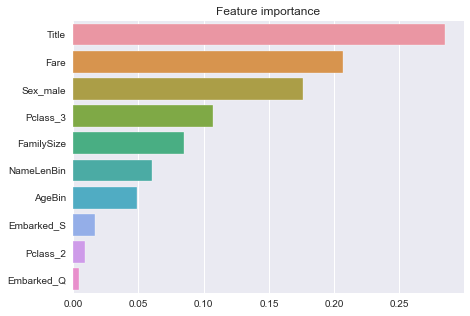

In [62]:
plot_feature_importances(rf_grid, X_train.columns)

In [76]:
pred_all_rf = rf_grid.predict(X_test_scaled)

sub_rf = pd.DataFrame()
sub_rf['PassengerId'] = passengerid
sub_rf['Survived'] = pred_all_rf
sub_rf.to_csv('rf_grid.csv',index=False)

# KNN

In [85]:
knn = KNeighborsClassifier()
leaf_range = list(range(3, 15, 1))
k_range = list(range(1, 15, 1))
weight_options = ['uniform', 'distance']
param_grid = dict(leaf_size=leaf_range, n_neighbors=k_range, weights=weight_options)
print(param_grid)

knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X_train, y_train)

sc_knn = get_best_score(knn_grid)

{'leaf_size': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance']}
Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7924094881398253
{'leaf_size': 3, 'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 3360 out of 3360 | elapsed:   21.9s finished


In [87]:
pred_all_knn = knn_grid.predict(X_test)

sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = passengerid
sub_knn['Survived'] = pred_all_knn
sub_knn.to_csv('knn.csv',index=False)

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split': [4,7,10,12]}
dtree_grid = GridSearchCV(dtree, param_grid, cv=10, refit=True, verbose=1)
dtree_grid.fit(X_train_scaled,y_train_scaled)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8104369538077403
{'min_samples_split': 10}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [91]:
pred_all_dtree = dtree_grid.predict(X_test_scaled)

sub_dtree = pd.DataFrame()
sub_dtree['PassengerId'] = passengerid
sub_dtree['Survived'] = pred_all_dtree
sub_dtree.to_csv('dtree.csv',index=False)

## Extra Tree Classifier

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
extr = ExtraTreesClassifier()

param_grid = {'max_depth': [6,7,8,9], 'max_features': [7,8,9,10],  
              'n_estimators': [50, 100, 200]}

extr_grid = GridSearchCV(extr, param_grid, cv=10, refit=True, verbose=1)
extr_grid.fit(X_train_scaled,y_train_scaled)
sc_extr = get_best_score(extr_grid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.833932584269663
{'max_depth': 7, 'max_features': 10, 'n_estimators': 100}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=7, max_features=10,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.1min finished


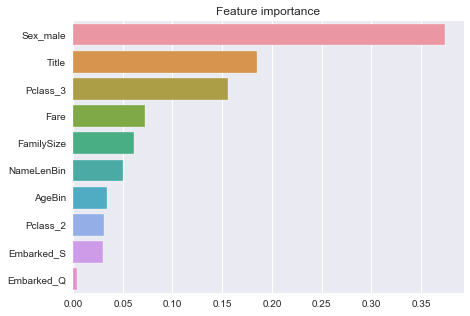

In [97]:
plot_feature_importances(extr_grid, X_train.columns)

In [98]:
pred_all_extr = extr_grid.predict(X_test_scaled)

sub_extr = pd.DataFrame()
sub_extr['PassengerId'] = passengerid
sub_extr['Survived'] = pred_all_extr
sub_extr.to_csv('extr.csv',index=False)

## Gradient Boost D Tree

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [50, 100], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}
gbc_grid = GridSearchCV(gbc, param_grid, cv=10, refit=True, verbose=1)
gbc_grid.fit(X_train_scaled,y_train_scaled)
sc_gbc = get_best_score(gbc_grid)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8429088639200998
{'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 50}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.3min finished


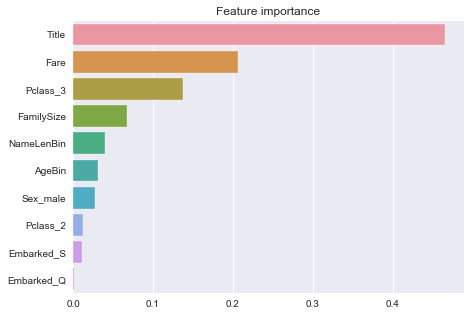

In [116]:
plot_feature_importances(gbc_grid, X_train.columns)

In [115]:
pred_all_gbc = gbc_grid.predict(X_test_scaled)

sub_gbc = pd.DataFrame()
sub_gbc['PassengerId'] = passengerid
sub_gbc['Survived'] = pred_all_gbc
sub_gbc.to_csv('gbc.csv',index=False)

## XGB

In [117]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [119]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = {'max_depth': [5,6,7,8], 'gamma': [1, 2, 4], 'learning_rate': [0.1, 0.2, 0.3, 0.5]}

with ignore_warnings(category=DeprecationWarning):
    xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
    xgb_grid.fit(X_train_scaled,y_train_scaled)
    sc_xgb = get_best_score(xgb_grid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.842896379525593
{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   58.6s finished


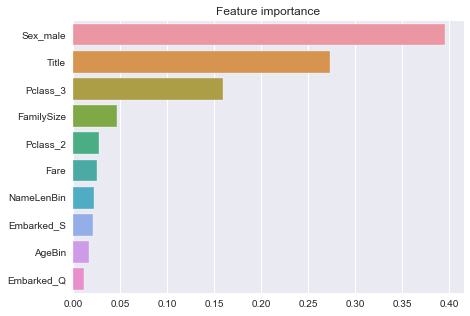

In [121]:
plot_feature_importances(xgb_grid, X_train.columns)

In [122]:
with ignore_warnings(category=DeprecationWarning):
    pred_all_xgb = xgb_grid.predict(X_test_scaled)

sub_xgb = pd.DataFrame()
sub_xgb['PassengerId'] = passengerid
sub_xgb['Survived'] = pred_all_xgb
sub_xgb.to_csv('xgb.csv',index=False)

## ADA Boost

In [128]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 0.2]}
ada_grid = GridSearchCV(ada, param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_train_scaled,y_train_scaled)
sc_ada = get_best_score(ada_grid)

pred_all_ada = ada_grid.predict(X_test_scaled)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   14.9s finished


0.8249188514357053
{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


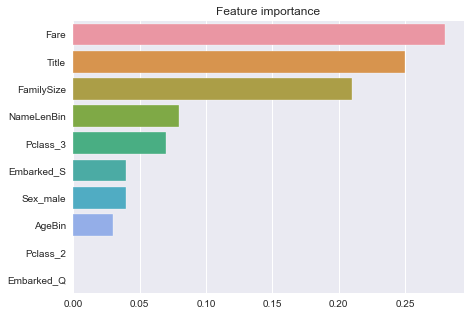

In [129]:
plot_feature_importances(ada_grid, X_train.columns)

In [130]:
sub_ada = pd.DataFrame()
sub_ada['PassengerId'] = passengerid
sub_ada['Survived'] = pred_all_ada
sub_ada.to_csv('ada.csv',index=False)

## LGBM

In [135]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(silent=False)
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }
lgbm_grid = GridSearchCV(lgbm, param_grid, cv=10, refit=True, verbose=1)
lgbm_grid.fit(X_train_scaled,y_train_scaled, verbose=True)
sc_lgbm = get_best_score(lgbm_grid)

pred_all_lgbm = lgbm_grid.predict(X_test_scaled)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  6.5min finished


0.8328339575530587
{'learning_rate': 0.012, 'max_depth': 8, 'n_estimators': 250, 'num_leaves': 80}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.012, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=250, n_jobs=-1, num_leaves=80, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


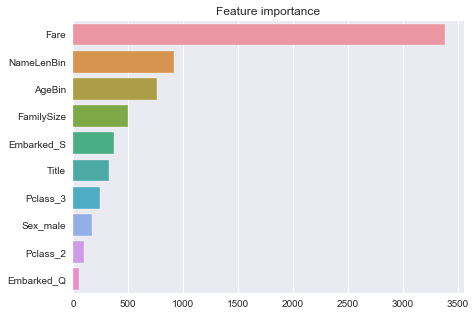

In [136]:
plot_feature_importances(lgbm_grid, X_train.columns)

In [137]:
sub_lgbm = pd.DataFrame()
sub_lgbm['PassengerId'] = passengerid
sub_lgbm['Survived'] = pred_all_lgbm
sub_lgbm.to_csv('lgbm.csv',index=False)

# Ans Check (PRIVATE CELLS)

In [73]:
ans = pd.read_csv("ans.csv")
ans = ans['Survived']

In [103]:
test_data_with_labels = pd.read_csv("titanicfull.csv")
test_data = pd.read_csv('test.csv')

In [104]:
for i, name in enumerate(test_data_with_labels['name']):
    if '"' in name:
        test_data_with_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test_data['Name']):
    if '"' in name:
        test_data['Name'][i] = re.sub('"', '', name)

C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Siraz\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [105]:
survived = []

for name in test_data['Name']:
    survived.append(int(test_data_with_labels.loc[test_data_with_labels['name'] == name]['survived'].values[-1]))

In [109]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('donotsubmit.csv', index=False)

In [112]:
ans_new = pd.read_csv('donotsubmit.csv')
ans_new = ans_new['Survived']

In [123]:
print(accuracy_score(ans,ans_new))

1.0


In [145]:
models_pred = [pred_all_svc,pred_all_rf,pred_all_knn,pred_all_dtree,pred_all_extr,pred_all_gbc,pred_all_xgb,pred_all_ada,pred_all_lgbm]
names = ['SVC','RF','KNN','DTREE','ETREE','GBDTREE','XGB','ADA','LGBM']
scores = []

for i in range(len(models_pred)):
    scores.append(accuracy_score(ans,models_pred[i]))

In [146]:
scores

[0.7751196172248804,
 0.7727272727272727,
 0.7272727272727273,
 0.722488038277512,
 0.7631578947368421,
 0.7679425837320574,
 0.7727272727272727,
 0.7727272727272727,
 0.7631578947368421]

In [147]:
scores_df = pd.DataFrame({
    'Model Name' : names,
    'Scores' : scores
})

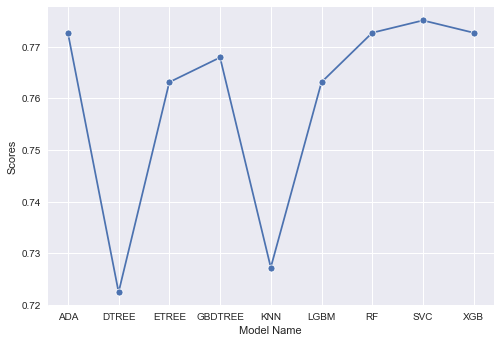

In [151]:
sns.lineplot(data = scores_df, x = 'Model Name', y = 'Scores',marker = 'o')
plt.show()